# PyCaret Intro 

In [1]:
#pip install --user matplotlib

In [2]:
# install pycaret
#! pip install pycaret

In [3]:
#pip install joblib==1.3.2


In [4]:
# import pycaret.clustering is a module within the PyCaret library that focuses on clustering algorithms. 
from pycaret.clustering import * 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
#import warning 
#warnings.filterwarnings('ignore')

# Dataset

In [7]:
df = pd.read_csv(r"C:\Users\senay\Desktop\AbsentData\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot: xlabel='Age', ylabel='Density'>

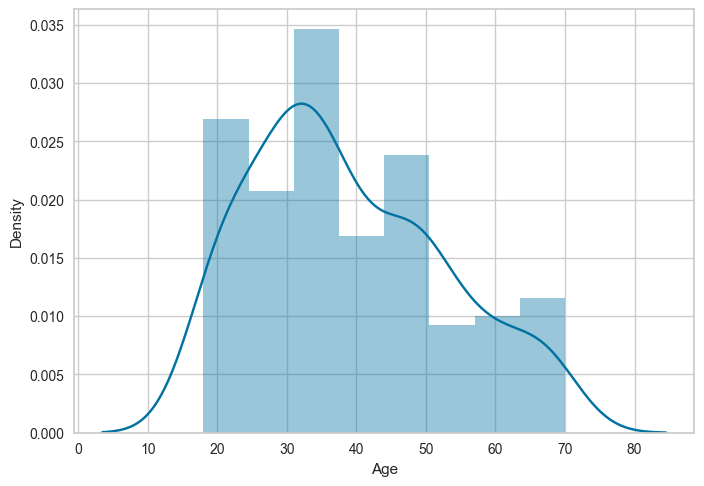

In [9]:
sns.distplot(df['Age'])

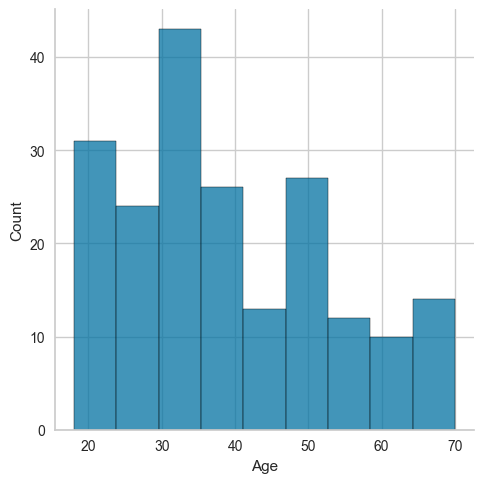

In [10]:
sns.displot(df['Age'])

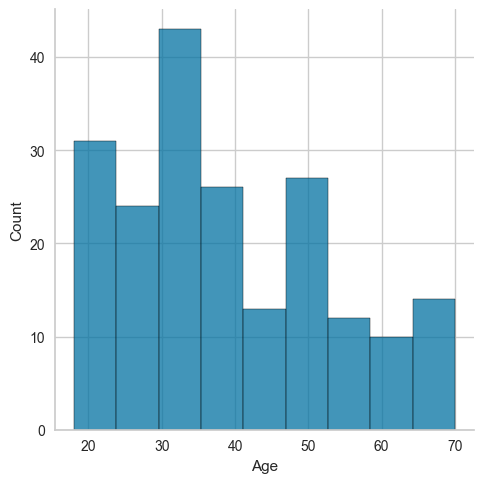

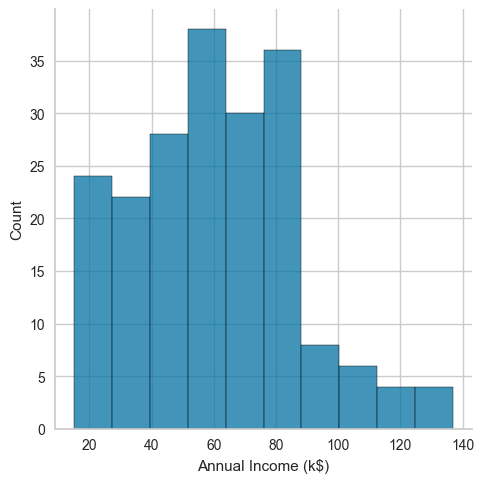

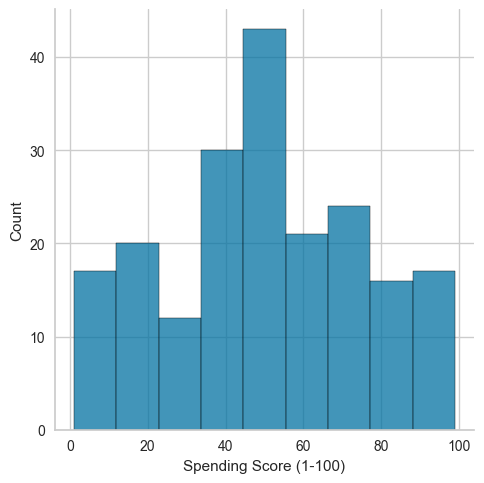

In [11]:
for i in ['Age', 'Annual Income (k$)','Spending Score (1-100)']: 
    sns.displot(df[i])

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

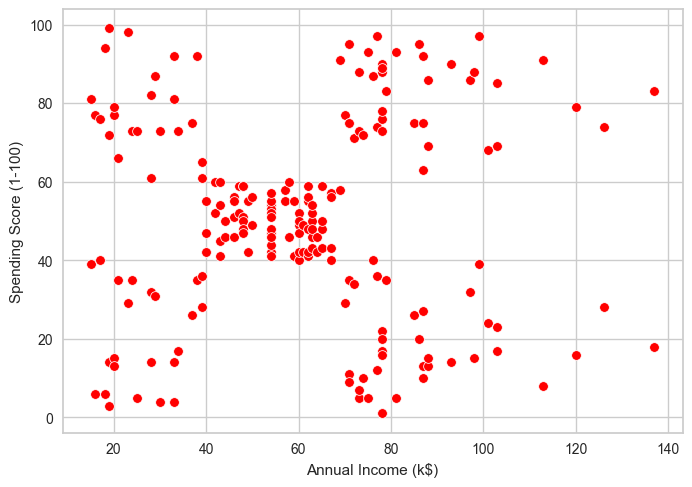

In [14]:
#scatterplot
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',color='red')


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

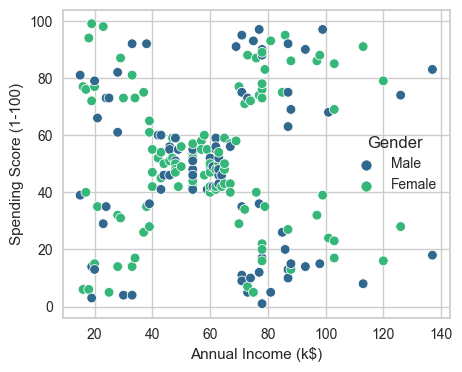

In [15]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'] , hue=df['Gender'], palette='viridis')

<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>

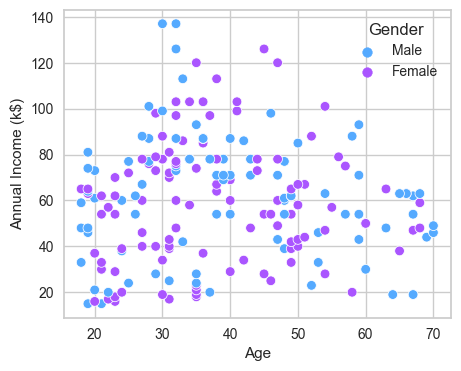

In [16]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'] , hue=df['Gender'], palette='cool')

<AxesSubplot: xlabel='Annual Income (k$)'>

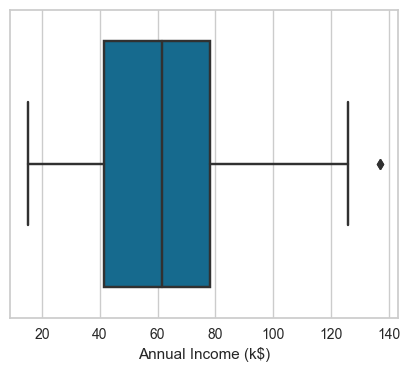

In [17]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df['Annual Income (k$)'])

<AxesSubplot: xlabel='Gender', ylabel='Annual Income (k$)'>

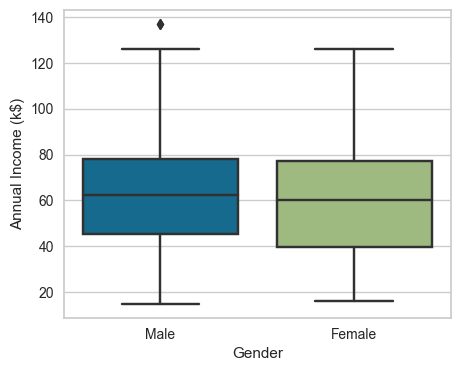

In [18]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Annual Income (k$)'], x=df['Gender'])

<AxesSubplot: xlabel='Gender', ylabel='Annual Income (k$)'>

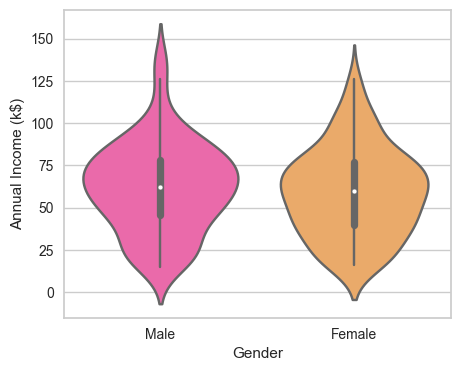

In [19]:
plt.figure(figsize=(5,4))
sns.violinplot(y=df['Annual Income (k$)'], x=df['Gender'], palette='spring')

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

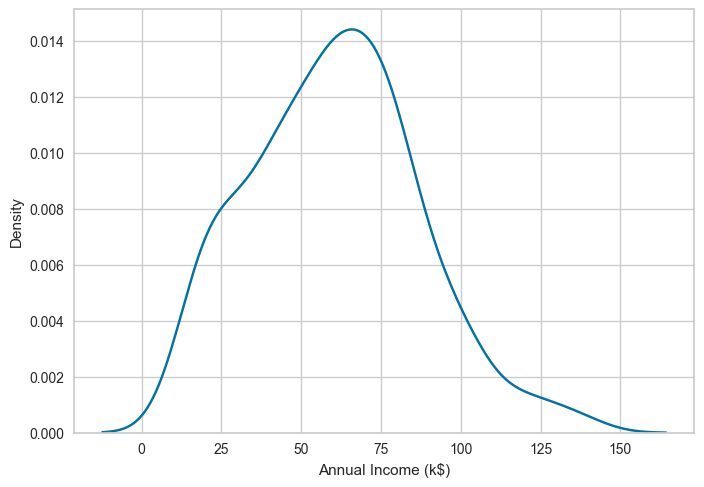

In [20]:
sns.kdeplot(df['Annual Income (k$)'])

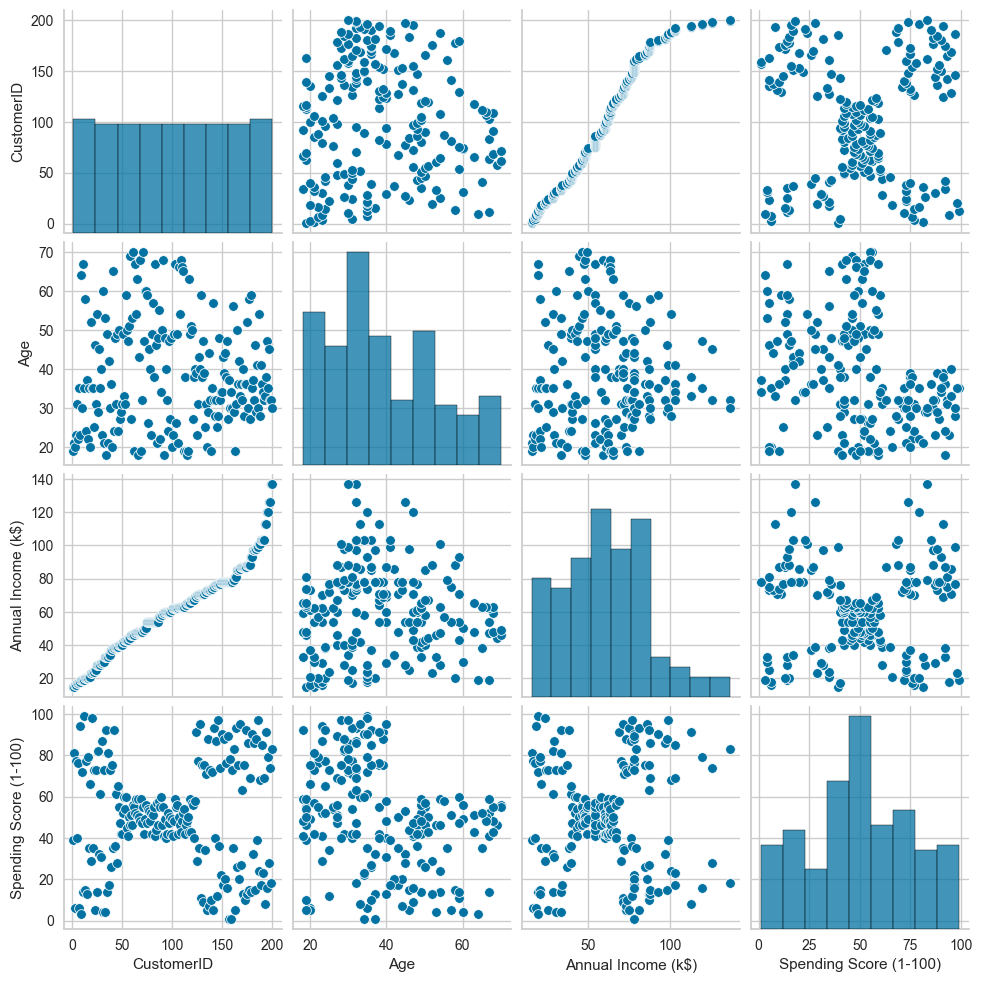

In [21]:
sns.pairplot(df)

# EDA

In [22]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# PyCaret Enviroment

In [24]:
#pick any session id number 
setup(data =df, normalize=True, ignore_features='CustomerID', session_id=123)
#setup(data=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], normalize=True, ignore_features=['CustomerID'], session_id=123)


,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,10
4,Ordinal features,1
5,Numeric features,3
6,Categorical features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


# Compare Evaluate and Create Model

In [25]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [26]:
#pip install threadpoolctl==3.1.0

In [27]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3016,69.8223,1.2912,0,0,0


In [28]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [29]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Plot the Model

In [30]:
kmeans_df = assign_model(kmeans)
kmeans_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 1
1,Male,21,15,81,Cluster 1
2,Female,20,16,6,Cluster 0
3,Female,23,16,77,Cluster 3
4,Female,31,17,40,Cluster 3


In [31]:
plot_model(kmeans)

# Saving Model

In [33]:
save_model(kmeans, 'trial_kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                        

In [34]:
#open conda prompt, make sure pycaret is installed

#open power bi via conda prompt

#make sure power bi python source/directory is anaconda 3

#import Mall customers csv to power bi and duplicate it 

#to the duplicated source, apply python scripting below, where import our tiral_kmeans file 

#import pandas as pd
#from pycaret.clustering import *
#kmeans = load_model("C:/Users/senay/Desktop/AbsentData/trial_kmeans")
#new_df= predict_model(kmeans, data=dataset)